In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import KNNImputer
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline




## PSS Model Selection

In [2]:
train = pd.read_csv( "../data/processed/pss_train.csv",  index_col=0)


y_train = train['Is_shunt']
X_train = train.drop(['Is_shunt'], axis=1)




In [3]:
# A dictionary of models with specified data preprocessing steps

def get_models():
    models = dict()
    
    models['Logistic Regression'] = Pipeline([('impute', KNNImputer()), 
                                              ('scale', MinMaxScaler()), 
                                              ('model', LogisticRegression(random_state=42, max_iter=1000, class_weight='balanced'))])
    
    models['Decision Tree'] = Pipeline([('impute', KNNImputer()), 
                                        ('model', DecisionTreeClassifier(random_state=42, class_weight='balanced'))])
    
    models['Random Forest'] = Pipeline([('impute', KNNImputer()), 
                                        ('model', RandomForestClassifier(random_state=42, class_weight='balanced'))])
    
    
    models['Gradient Boosting'] = Pipeline([ 
                                            ('model', XGBClassifier(random_state=42, class_weight='balanced'))])
    
    models['SVC'] = Pipeline([('impute', KNNImputer()), 
                                ('scale', MinMaxScaler()), 
                              ('model', SVC(class_weight='balanced', random_state=42))])
    
    models['Nearest Neighbor'] = Pipeline([('impute', KNNImputer()), 
                                            ('scale', MinMaxScaler()), 
                                           ('model', KNeighborsClassifier(3))])
    
    models['Multilayer Perceptron'] = Pipeline([('impute', KNNImputer()), 
                                              ('scale', MinMaxScaler()), 
                                           ('model', MLPClassifier(random_state=42))])
    
    models['Linear Discriminant Analysis'] = Pipeline([('impute', KNNImputer()), 
                                              ('scale', MinMaxScaler()),  
                                           ('model', LinearDiscriminantAnalysis())])
    

    
    return models

In [4]:
# calculate roc auc all the models using RepeatedStratifiedKFold
def evaluate_model(model, X, y):
    cv = RepeatedStratifiedKFold(n_splits=8, 
                                 n_repeats=10, 
                                 random_state=1)
    scores = cross_val_score(model, X, y, 
                             scoring='roc_auc', 
                             cv=cv, n_jobs=-1)
    return scores

* Logistic Regression Score = 0.953 StdDev = (0.019) 

* Decision Tree Score = 0.841 StdDev = (0.031) 

* Random Forest Score = 0.970 StdDev = (0.016) 

* Gradient Boosting Score = 0.971 StdDev = (0.015) 

* SVC Score = 0.957 StdDev = (0.017) 

* Nearest Neighbor Score = 0.882 StdDev = (0.029) 

* Multilayer Perceptron Score = 0.959 StdDev = (0.020) 

* Linear Discriminant Analysis Score = 0.959 StdDev = (0.018) 



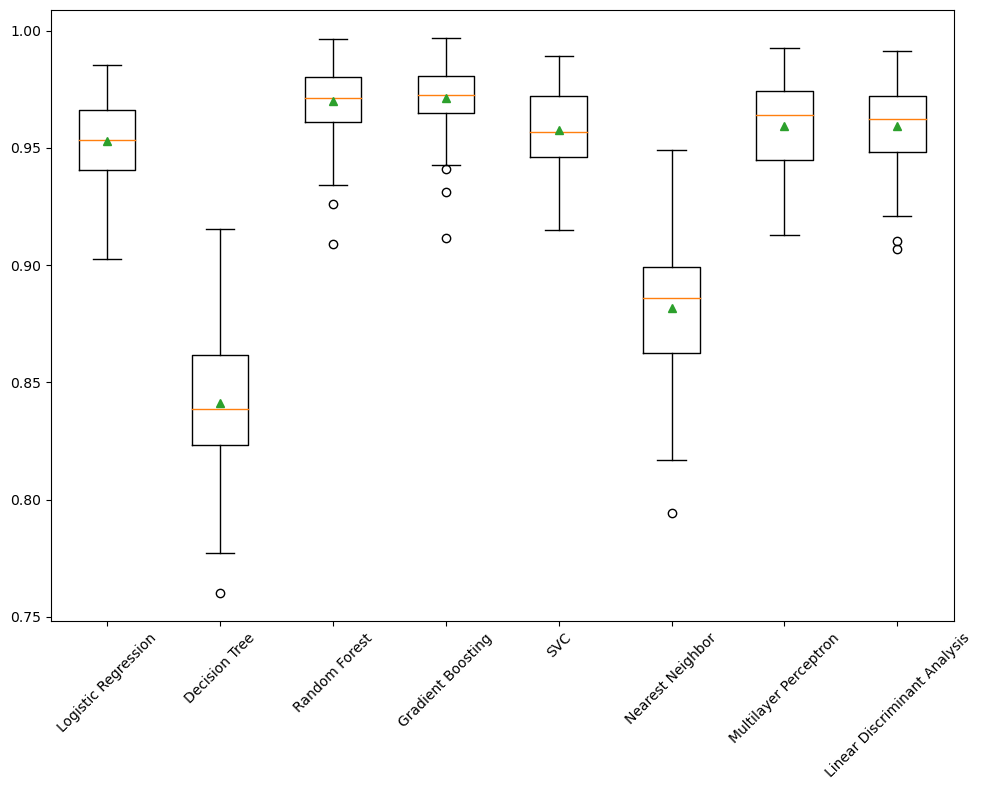

In [5]:
models = get_models()

# evaluate the models and store results
results, names, time = list(), list(), list()
for name, model in models.items():
    scores = evaluate_model(model, X_train, y_train)
    results.append(scores)
    names.append(name)
    print('* %s Score = %.3f StdDev = (%.3f)' % (name, np.mean(scores), np.std(scores)), '\n')

# plot model performance for comparison
plt.figure(figsize=(10,8))
plt.boxplot(results, labels=names, showmeans=True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('../reports/figures/pss_model_selection.png', dpi=100)

## Subcat Model Selection

In [2]:
train_multi = pd.read_csv( "../data/processed/subcat_train.csv",  index_col=0)


y_train_multi = train_multi['Shunt_type']
X_train_multi = train_multi.drop(['Shunt_type'], axis=1)

In [3]:
def get_models():
    models = dict()
    
    models['Logistic Regression'] = Pipeline([('impute', KNNImputer()), 
                                              ('scale', MinMaxScaler()), 
                                              ('model', LogisticRegression(random_state=42, max_iter=1000, class_weight='balanced'))])
    
    models['Decision Tree'] = Pipeline([('impute', KNNImputer()), 
                                        ('model', DecisionTreeClassifier(random_state=42, class_weight='balanced'))])
    
    models['Random Forest'] = Pipeline([('impute', KNNImputer()),
                                        ('model', RandomForestClassifier(random_state=42, class_weight='balanced'))])
    
    
    models['Gradient Boosting'] = Pipeline([  
                                            ('model', XGBClassifier(random_state=42, class_weight='balanced'))])

    
    models['Nearest Neighbor'] = Pipeline([('impute', KNNImputer()), 
                                            ('scale', MinMaxScaler()), 
                                           ('model', KNeighborsClassifier(3))])
    
    models['Multilayer Perceptron'] = Pipeline([('impute', KNNImputer()), 
                                              ('scale', MinMaxScaler()), 
                                           ('model', MLPClassifier(random_state=42))])
    
    models['Linear Discriminant Analysis'] = Pipeline([('impute', KNNImputer()), 
                                              ('scale', MinMaxScaler()),  
                                           ('model', LinearDiscriminantAnalysis())])
    

    
    return models

In [4]:
def evaluate_model(model, X, y):
    cv = RepeatedStratifiedKFold(n_splits=8, 
                                 n_repeats=10, 
                                 random_state=1)
    scores = cross_val_score(model, X, y, 
                             scoring='roc_auc_ovr_weighted', 
                             cv=cv, n_jobs=-1)
    return scores

* Logistic Regression Score = 0.918 StdDev = (0.020) 

* Decision Tree Score = 0.772 StdDev = (0.030) 

* Random Forest Score = 0.948 StdDev = (0.016) 

* Gradient Boosting Score = 0.947 StdDev = (0.015) 

* Nearest Neighbor Score = 0.850 StdDev = (0.032) 

* Multilayer Perceptron Score = 0.935 StdDev = (0.018) 

* Linear Discriminant Analysis Score = 0.928 StdDev = (0.018) 



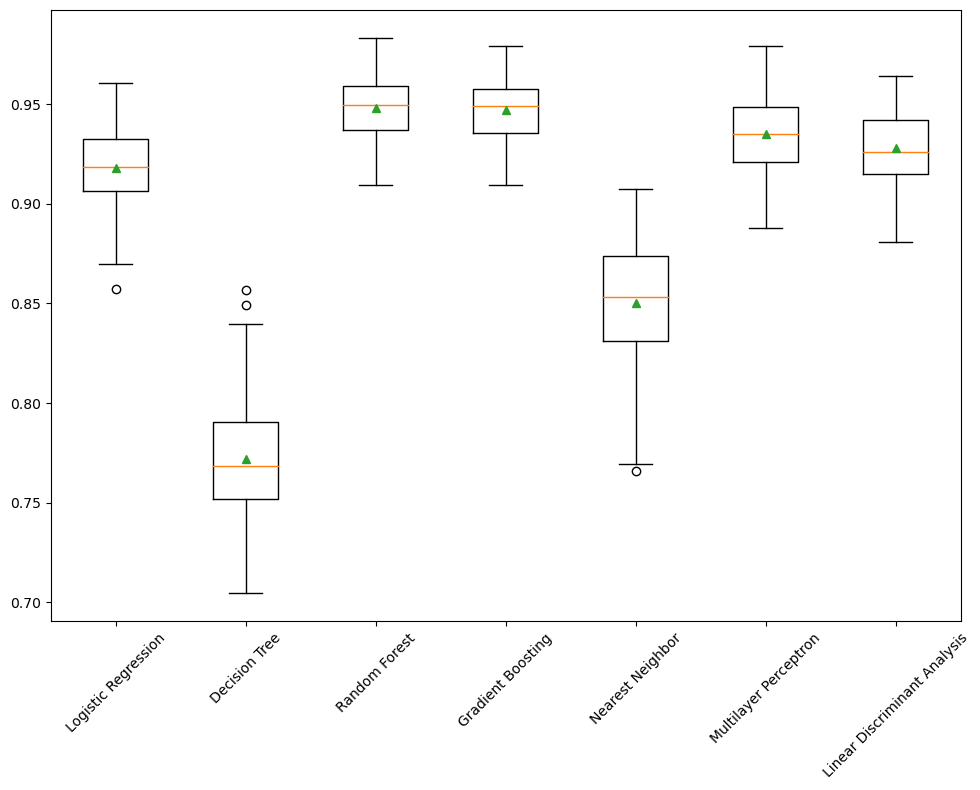

In [5]:
models = get_models()

# evaluate the models and store results
results, names, time = list(), list(), list()
for name, model in models.items():
    scores = evaluate_model(model, X_train_multi, y_train_multi)
    results.append(scores)
    names.append(name)
    print('* %s Score = %.3f StdDev = (%.3f)' % (name, np.mean(scores), np.std(scores)), '\n')

# plot model performance for comparison
plt.figure(figsize=(10,8))
plt.boxplot(results, labels=names, showmeans=True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('../reports/figures/subcat_model_selection.png', dpi=100)